In [1]:
from read_data import data_to_dataframe
from cleaning import clean_all
import pandas as pd

In [2]:
df = data_to_dataframe()

In [3]:
df = clean_all(df)

In [4]:
df.head()

,sophoraId,externalId,title,date,tags,topline,firstSentence,geotags,regionId,regionIds,type,breakingNews,alttext,copyright,ressort
0,ndr-36-jaehriger-schwimmer-tot-aus-kiessee-bei...,tagesschau_fm-story-id-4ed766b3-779f-44f7-9faa...,36-jähriger Schwimmer tot aus Kiessee bei Frie...,2023-10-22 19:52:00+02:00,[Niedersachsen],Niedersachsen,"Taucher fanden den Mann rund eine Stunde, nach...",[],9.0,[9],story,False,NaN,NaN,NaN
1,wettervorhersage-europa-100,a13811c2-a633-446d-8c44-f854dbdb9233,Wetterlage und Temperaturen,2023-10-22 19:46:52.550000+02:00,[Wetter],Wettervorhersage Europa,,[],0.0,[],story,False,NaN,NaN,NaN
2,hr-buergermeisterwahlen-ein-amtsinhaber-muss-g...,tagesschau_fm-story-id-902744f0-b542-4f4c-8098...,Bürgermeisterwahlen: Ein Amtsinhaber muss gehe...,2023-10-22 19:44:54.726000+02:00,[Hessen],Hessen,In vier hessischen Kommunen fanden am Sonntag ...,[],7.0,[7],story,False,NaN,NaN,NaN
3,sr-schweres-los-fuer-gabriel-clemens-bei-darts...,tagesschau_fm-story-gabriel_clemens_bei_darts_...,Schweres Los für Gabriel Clemens bei Darts-EM,2023-10-22 19:34:00+02:00,[Saarland],Saarland,Ab nächsten Donnerstag tritt der Honzrather Da...,[],12.0,[12],story,False,NaN,NaN,NaN
4,ndr-verbot-pro-palaestinensischer-demos-in-ham...,tagesschau_fm-story-id-da32f992-bc30-4f21-ba91...,Verbot pro-palästinensischer Demos in Hamburg ...,2023-10-22 19:30:00+02:00,[Hamburg],Hamburg,Pro-palästinensische Kundgebungen sind nun in ...,[],6.0,[6],story,False,NaN,NaN,NaN


In [5]:
all_tags = [tag for tags_list in df['tags'] for tag in tags_list]

In [8]:
tag_counts = pd.Series(all_tags).value_counts()

<Axes: >

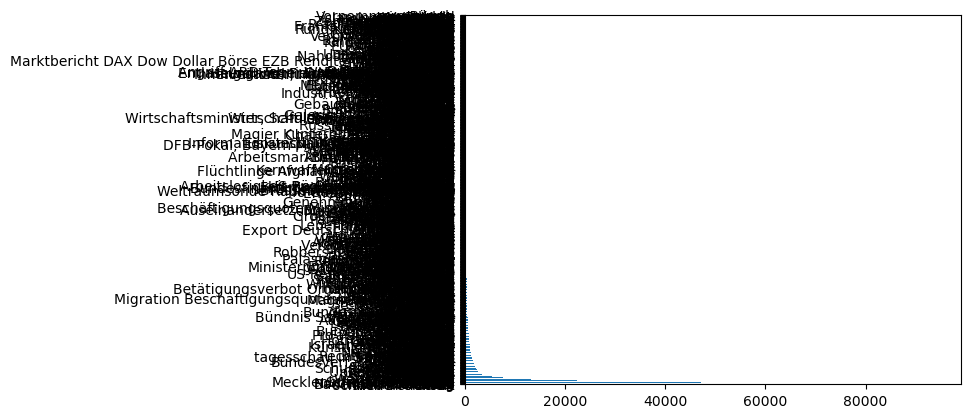

In [10]:
tag_counts.plot(kind='barh')

In [34]:
tag_counts.head(25)

schnell informiert        94252
Niedersachsen             75267
Berlin                    53928
Israel                    52651
Rheinland-Pfalz           50726
Baden-Württemberg         48055
Hessen                    47133
Hamburg                   45279
Saarland                  39525
Nordrhein-Westfalen       36130
Brandenburg               35877
Schleswig-Holstein        28241
Mecklenburg-Vorpommern    26123
Gaza                      22425
Hamas                     18355
Nahost                    17677
Schwerpunkt               17088
Ukraine                   13181
Bremen                    13181
Krieg                     11621
Migration                 11035
USA                       10995
Wetteraussichten          10703
Liveblog                   9392
Gazastreifen               7568
Name: count, dtype: int64

In [21]:
top_tags = tag_counts.head(20)

<Axes: >

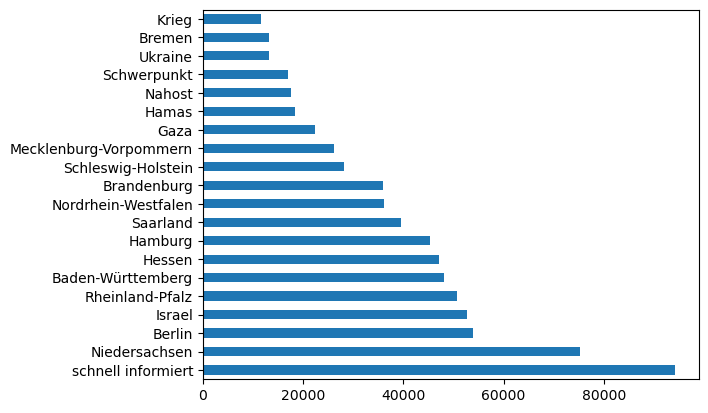

In [22]:
top_tags.plot(kind='barh')

In [24]:
tags_to_remove = ['Bundesländer',
                  'Baden-Württemberg',
                  'Bayern',
                  'Berlin',
                  'Brandenburg',
                  'Bremen',
                  'Hamburg',
                  'Hessen',
                  'Mecklenburg-Vorpommern',
                  'Niedersachsen',
                  'Nordrhein-Westfalen',
                  'Rheinland-Pfalz',
                  'Saarland',
                  'Sachsen',
                  'Sachsen-Anhalt',
                  'Schleswig-Holstein',
                  'Thüringen']
mask = ~tag_counts.index.isin(tags_to_remove)
tags_without_regions = tag_counts[mask]

In [25]:
tags_without_regions

schnell informiert    94252
Israel                52651
Gaza                  22425
Hamas                 18355
Nahost                17677
                      ...  
Benner                   11
Kindergeld               11
Vorschlag                 7
Kerth                     1
Vorpommern-Rügen          1
Name: count, Length: 1327, dtype: int64

In [31]:
top_tags_without_regions = tags_without_regions.head(25)

<Axes: >

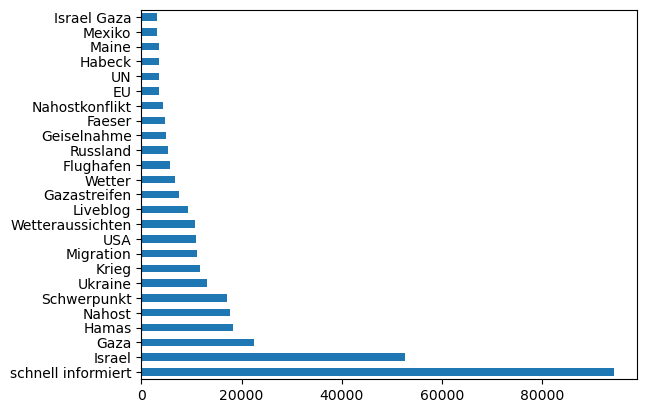

In [32]:
top_tags_without_regions.plot(kind='barh')

In [46]:
def tag_count():
    all_tags = [tag for tags_list in df['tags'] for tag in tags_list]
    tag_counts = pd.Series(all_tags).value_counts()
    return tag_counts

In [47]:
def top_tags(topX):
    tag_count()
    
    top_tags = tag_counts.head(topX)
    return top_tags

In [45]:
def top_tags_without_regions(topX):
    tags_to_remove = ['Bundesländer','Baden-Württemberg','Bayern','Berlin',
                      'Brandenburg','Bremen','Hamburg','Hessen',
                      'Mecklenburg-Vorpommern','Niedersachsen','Nordrhein-Westfalen','Rheinland-Pfalz',
                      'Saarland','Sachsen','Sachsen-Anhalt','Schleswig-Holstein','Thüringen']
    
    tag_count()
    
    mask = ~tag_counts.index.isin(tags_to_remove)
    tags_without_regions = tag_counts[mask]
    top_tags_without_regions = tags_without_regions.head(topX)
    return top_tags_without_regions